#*Support-vector Machine* (SVM) e o truque do *Kernel*

Fontes da aula de hoje:
1. Capítulos 21 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

2. Várias páginas da documentação da ``scikit-learn``

3. Várias figuras da Wikipedia (https://en.wikipedia.org/wiki/Support-vector_machine)

# Introdução

## Nosso problema de interesse

Dados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, a tarefa de classificação consiste em encontrar um modelo $f$ que aprenda dos vetores de características os rótulos.

Há dois requisitos principais:

1. Se $(\mathbf{x}, y) \in D$, então $f(\mathbf{x}) = y$ com alta probabilidade.

2. A função aprendida deve ser **generalizável**. Se um novo $\mathbf{x}$ não pertencente ao conjunto $D$ for observado, deseja-se também que $f(\mathbf{x})$ seja o rótulo correto de $\mathbf{x}$ com alta probabilidade.

**IMPORTANTE:** No contexto de SVM, vamos assumir que $y_i \in \{-1, 1\}$.

# Aula Passada

**Entrada:**
- um conjunto de pontos rotulados (problema de classificação binária) **que pode ser separado** por uma função linear (hiperplano)

**Objetivo:**
- Encontrar o "melhor" hiperplano de separação.

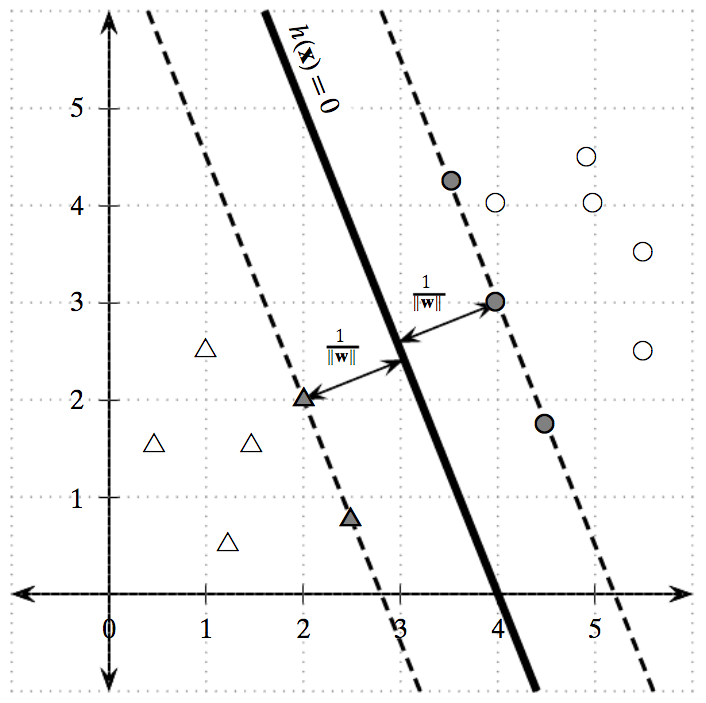

## Formulação

A ideia fundamental do SVM é encontrar a representação canônica de um hiperplano de separação que tenha **margem máxima** entre todos os hiperplanos de separação (que separem $D$ de forma pura).

**Função objetivo:**
$$\min_{\mathbf{w}, b} \frac{\Vert\mathbf{w}\Vert^2}{2}$$

**Restrições:** $y_i(\mathbf{w}^T\mathbf{x}_i+b) \ge 1$, para $i = 1, \dots, n$.

## O Problema *dual*

**Objetivo:**

$$\max_{\mathbf{\alpha}} \sum_{i = 1}^n\alpha_i - \frac{1}{2}\sum_{i = 1}^n\sum_{j = 1}^n\alpha_i\alpha_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j$$

**Restrições:**
1. $\alpha_i \ge 0$, $i = 1, \dots, n$.
2. $\sum_{i = 1}^n\alpha_iy_i = 0$

## Vetores de suporte, $\mathbf{w}$ e $b$

Os vetores de suporte são aqueles que **estão sobre a margem do hiperplano**.

Vamos denotar por $S$ o conjunto dos vetores de suporte.

Para encontrar $\mathbf{w}$ e $b$, precisamos apenas dos vetores em $S$ e suas respectivas classes.




# SVM para casos *quase* linearmente separáveis

Considere o seguinte conjunto de dados.

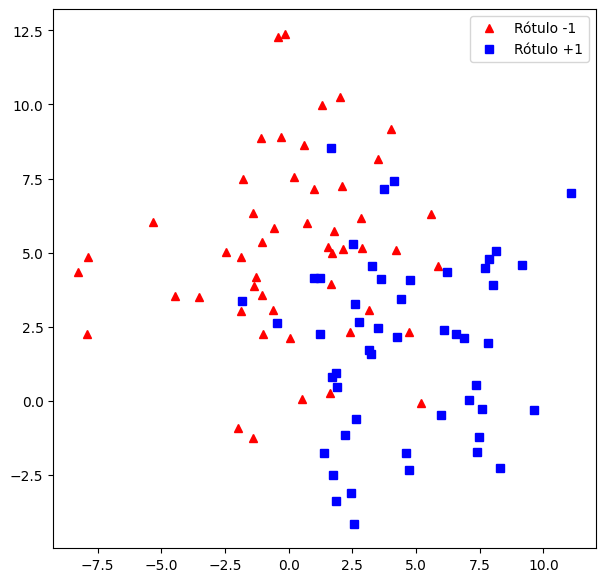

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

plt.figure(figsize = (7,7))
X, y = datasets.make_blobs(n_samples = 100, centers = 2, n_features = 2, center_box = (0, 10), cluster_std=3, random_state = 9)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = 'Rótulo -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Rótulo +1')
plt.legend(loc = 'best');

Pergunta-se:
1. O conjunto de dados acima é linearmente separável?
2. O conjunto de dados é *quase* linearmente separável?

Na aula de hoje (parte I), vamos estender a metodologia vista na aula passada para problemas que podem ser **bem** separados por um hiperplano (mesmo que de forma **não perfeita**).

A ideia, na verdade, é muito similar ao que já fizemos. Vamos buscar por um hiperplano de **margem máxima** que separe as duas classes.

No entanto, vamos permitir algumas **violações** da margem.

Assim, queremos um hiperplano de margem máxima e erro mínimo!

A Figura a seguir ilustra o conceito (Fonte: livro texto).

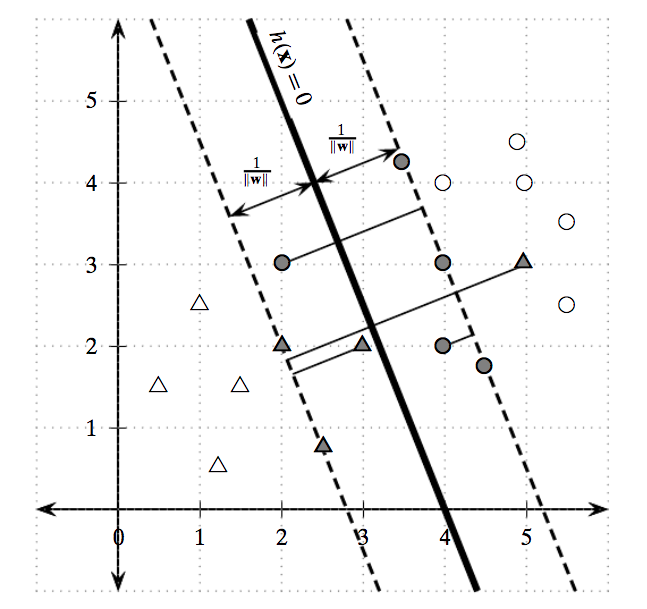

Para incorporar essa ideia de erro/violação da margem, vamos adicionar novas variáveis. Para cada elemento do conjunto de dados, vamos criar uma variável $\xi_i$ ($i = 1, \dots, n$), que representa o **grau de violação que o elemento possui com relação a margem**. Há várias formas de quantificar o grau de violação. Uma delas é dada da seguinte maneira:

$$
\xi_i =
\begin{cases}
  0, \text{se o elemento está do lado certo da margem.}\\
  1 - y_i(\mathbf{w}^T\mathbf{x} + b), \text{caso contrário}
\end{cases}
$$

Essa definição de erro (conhecida como *Hinge Loss*) garante que:
1. Elementos que não violem a margem tenham $\xi_i = 0$
2. Elementos que violam a margem mas não violam o hiperplano tenham $0 < \xi_i \le 1$
3. Elementos que violam o hiperplano tenham $\xi_i > 1$

## Em resumo

1. Queremos um classificador de margem máxima. Ou seja, queremos minimizar $\frac{1}{2}\Vert\mathbf{w}\Vert^2$.
2. Queremos um classificador com erro pequeno. Ou seja, queremos minimizar $\sum_{i = 1}^n\xi_i$

## O problema de otimização

Combinando a intuição que aprendemos acima com a aula passada, temos o seguinte problema de otimização.

**Objetivo**
$$\min_{\mathbf{w}, b, \xi}\frac{1}{2}\Vert\mathbf{w}\Vert^2 + C\sum_{i = 1}^n\xi_i$$

**Restrições**
1. $y_i(\mathbf{w}^T\mathbf{x}_i + b) \ge 1 - \xi_i$, $i = 1, \dots, n$
2. $\xi_i \ge 0$, $i = 1, \dots, n$.

O que é o $C$?

1. $C$ é uma constante e deve ser fornecido pelo usuário. É um hiperparâmetro! Idealmente, deve ser encontrado de acordo com alguma técnica de validação cruzada.

2. $C$ controla a relação entre **margem** e **erro**.
>- Um $C$ grande dá mais peso ao **erro** e tende a gerar classificadores com uma margem pequena.
>- Um $C$ pequeno dá menos peso ao **erro** e tende a gerar classificadores com uma margem grande.

## O Problema *dual*

Utilizando multiplicadores de Lagrange, o dual do problema acima é dado a seguir.

**Objetivo:**

$$\max_{\mathbf{\alpha}} \sum_{i = 1}^n\alpha_i - \frac{1}{2}\sum_{i = 1}^n\sum_{j = 1}^n\alpha_i\alpha_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j$$

**Restrições:**
1. $0 \le \alpha_i \le C$, $i = 1, \dots, n$
2. $\sum_{i = 1}^n\alpha_iy_i = 0$

## $\mathbf{w}$, $b$ e vetores de suporte

Com a teoria de multiplicadores de Lagrange e condições KKT. Temos:

1. Os **vetores de suporte** são todos os elementos que estão sobre a margem ou do lado errado da margem.

2. $\mathbf{w}$ e $b$ podem ser calculados a partir dos vetores de suporte.

## Exemplo da importância do $C$

Modifique o valor de $C$ no código abaixo e observe o impacto na margem e nos vetores de suporte.

Código baseado na documentação da [``scikit-learn``](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

clf = svm.SVC(kernel = "linear", C = 0.01)
clf.fit(X, y);

<ipython-input-54-4c33a6cfee73>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("RdBu"), label = "Vetores de Suporte")
<ipython-input-54-4c33a6cfee73>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


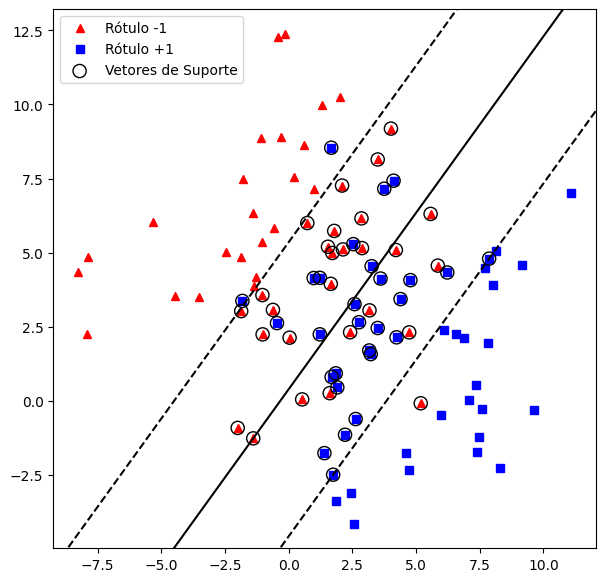

In [ ]:
#@title
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-50, 50)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(figsize = (7, 7))

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = 'Rótulo -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = 'Rótulo +1')

plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s = 90,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"), label = "Vetores de Suporte")

xl = plt.xlim()
yl = plt.ylim()

plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.xlim(xl)
plt.ylim(yl)

plt.legend(loc = 'best');

# SVM para casos não linearmente separáveis

## Motivação

Considere o conjunto de pontos abaixo. Há algum hiperplano capaz de separar os pontos de acordo com as classes?

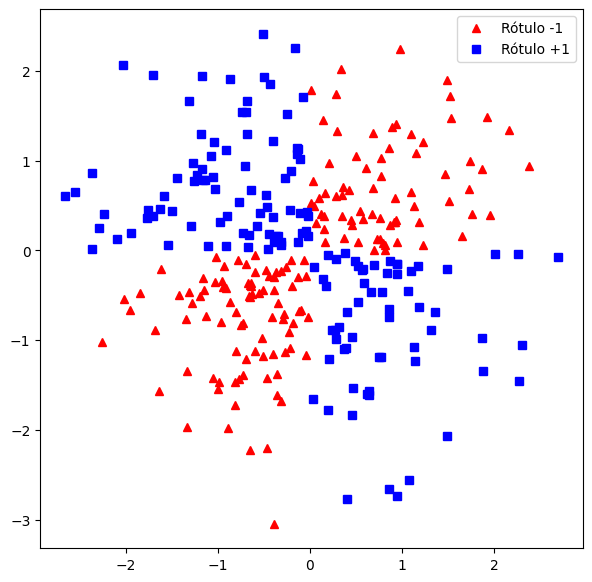

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

plt.figure(figsize = (7,7))

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^', label = 'Rótulo -1')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs', label = 'Rótulo +1')
plt.legend(loc = 'best');

Em muitas situações, os elementos de um conjunto de dados não podem ser separados de uma forma satisfatória por uma função linear (hiperplano).

Nesses casos, o que vimos até agora não é suficiente!

No entanto, nem tudo está perdido, ainda é possível utilizar o SVM que vimos. Para isso, vamos transformar o nosso conjunto de dados com uma função de transformação $\phi$.

A ideia é escolher uma função $\phi$ tal que o novo conjunto de dados $D' = \{(\phi(\mathbf{x}_i), y_i)\}_{i = 1}^n$ possa ser bem separado por uma função linear.

### Exemplo I

Famosa figura da Wikipedia. Fonte [aqui](https://en.wikipedia.org/wiki/Support-vector_machine).

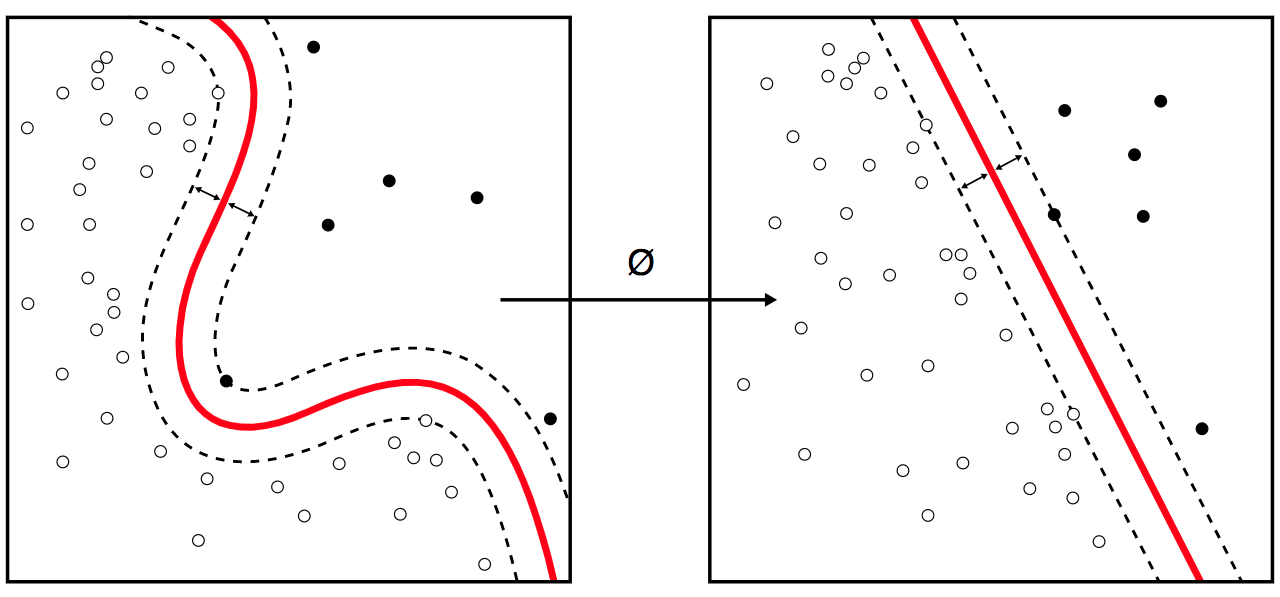

### Exemplo II

Também da Wikipedia. Fonte [aqui](https://en.wikipedia.org/wiki/Support-vector_machine).

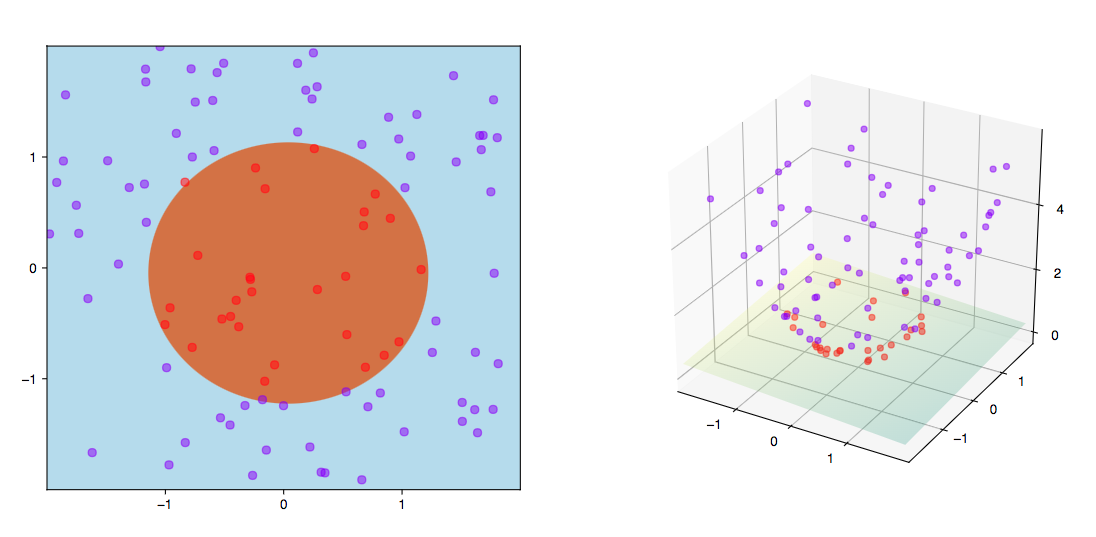

No caso acima, tem-se que $\phi: \mathbb{R}^2 → \mathbb{R}^3$, com
$$
\phi(a, b) = (a, b, a^2 + b^2).
$$

Veja que após a transformação, um plano consegue separar os pontos das duas classes de forma aproximada.

### Em resumo

Vamos aplicar uma transformação $\phi$ nos dados e usar o SVM que vimos até então!

Pergunta-se:
1. Sempre é possível fazer essa transformação?
2. Qual é uma boa $\phi$ que vai funcionar em geral?

## Teorema de Cover

Versão extraída da [Wikipedia](https://en.wikipedia.org/wiki/Cover%27s_theorem).

Por **Thomas M. Cover**, 1965.

*A complex pattern-classification problem, cast in a high-dimensional space nonlinearly, is more likely to be linearly separable than in a low-dimensional space, provided that the space is not densely populated.*

## Ideia

Vamos usar uma $\phi$ que mapeie nossos pontos para uma dimensão **infinita**. Essa transformação vai potencializar a chance do dataset ser linearmente separável após a transformação!

YES!

## Formulação do problema

### Primal

**Objetivo**
$$\min_{\mathbf{w}, b, \xi}\frac{1}{2}\Vert\mathbf{w}\Vert^2 + C\sum_{i = 1}^n\xi_i$$

**Restrições**
1. $y_i(\mathbf{w}^T\phi(\mathbf{x}_i) + b) \ge 1 - \xi_i$, $i = 1, \dots, n$
2. $\xi_i \ge 0$, $i = 1, \dots, n$.

Repare que $\mathbf{w}$ deve ser um vetor de dimensão infinita... Assim, a resolução do problema primal passa a ser inviável...

### Dual

O dual, no entanto, tem características mais amigáveis...

**Objetivo:**

$$\max_{\mathbf{\alpha}} \sum_{i = 1}^n\alpha_i - \frac{1}{2}\sum_{i = 1}^n\sum_{j = 1}^n\alpha_i\alpha_jy_iy_j\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)$$

**Restrições:**
1. $0 \le \alpha_i \le C$, $i = 1, \dots, n$
2. $\sum_{i = 1}^n\alpha_iy_i = 0$

Veja que o dual depende **apenas** do produto interno entre dois vetores de dimensão infinita...
Parece estranho, mas isso é totalmente aceitável.

#### Kernel

Há na literatura, **várias** funções que satisfazem as seguintes propriedades (e várias outras). Essas funções são conhecidas como *kernels*.

$$
K: \mathbb{R}^d \times \mathbb{R}^d → \mathbb{R}\\
(\mathbf{x}, \mathbf{x}') ↦ \phi(\mathbf{x})^T\phi(\mathbf{x}'),
$$
onde $\phi(\mathbf{x})$ tem dimensão infinita.

Um exemplo, é o *kernel* RBF (*Radial Basis Function*). Nesse caso:
$$
K(\mathbf{x}, \mathbf{x}') = e^{-\gamma\Vert\mathbf{x} - \mathbf{x}'\Vert^2},
$$
onde $\gamma$ é uma constante e deve ser fornecida pelo usuário.

### Novo dual

Com o uso de *kernels* podemos atacar o dual de uma forma prática. Isso é conhecido como "Truque do *Kernel*".

**Objetivo:**

$$\max_{\mathbf{\alpha}} \sum_{i = 1}^n\alpha_i - \frac{1}{2}\sum_{i = 1}^n\sum_{j = 1}^n\alpha_i\alpha_jy_iy_jK(\mathbf{x}_i, \mathbf{x}_j)$$

**Restrições:**
1. $0 \le \alpha_i \le C$, $i = 1, \dots, n$
2. $\sum_{i = 1}^n\alpha_iy_i = 0$

### Vetores de suporte e classificando um ponto

Ao resolver o problema acima, e utilizando a teoria relacionada aos multiplicadores de Lagrange:

1. Os vetores de suporte têm índices tais que $\alpha_i > 0$.

2. Para classificar um ponto qualquer, $\mathbf{z}$, precisamos apenas dos vetores de suporte. Por isso, muitas vezes o SVM é dito ser uma "máquina esparsa".

## No caso do nosso exemplo inicial

Código adaptado da documentação da [``scikit-learn``](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html)

In [ ]:
from sklearn import svm

clf = svm.SVC(gamma = 1, C = 100)
clf.fit(X, Y);

<ipython-input-57-4844b97fd9c7>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("RdBu"),
<ipython-input-57-4844b97fd9c7>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


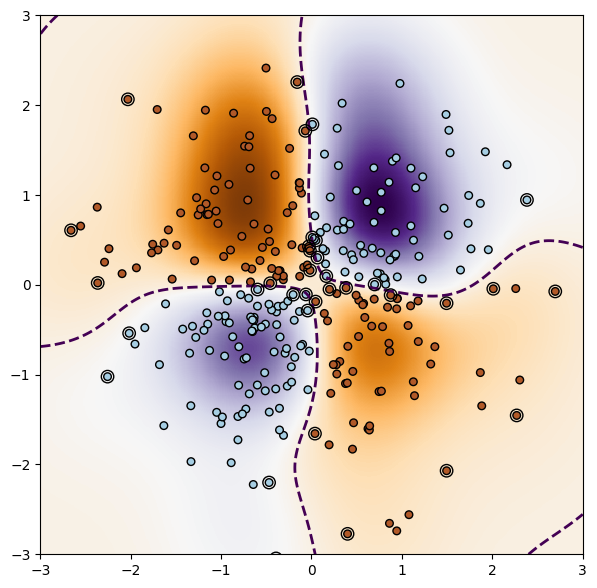

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

plt.figure(figsize = (7, 7))

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")

plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )


#plt.xticks(())
#plt.yticks(())




plt.axis([-3, 3, -3, 3]);

# Alguns aspectos práticos

1. Há vários outros tipos de *kernels*. O *kernel* RBF é um dos mais populares e utilizados;
2. Os hiperparâmetros $\gamma$ e $C$ devem ser ajustados via validação cruzada e busca exaustiva. Um exemplo [aqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)
3. O SVM é sensível a escala dos dados. É uma boa prática transformar os dados com algum *scaler*.

# What is next?

Aula de encerramento...